# House Prices Prediction using Sklearn

This notebook provides a step-by-step guide on predicting house prices using various regression models from the sklearn library.

## Import the library

In [1]:
# Libraries for sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


## Load the dataset


In [6]:
train_file_path = "/Users/dogesun/Downloads/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions of our dataset by printing out the first 3 entries using the following code:

In [7]:
dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


* There are 79 feature columns. Using these features your model has to predict the house sale price indicated by the label column named `SalePrice`.

We will drop the `Id` column as it is not necessary for model training.

In [8]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


We can inspect the types of feature columns using the following code:

In [9]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## House Price Distribution

Now let us take a look at how the house prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/var/folders/pk/bxg46_yn1fg49zsqkzbqxdbc0000gp/T/ipykernel_76193/3430012634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


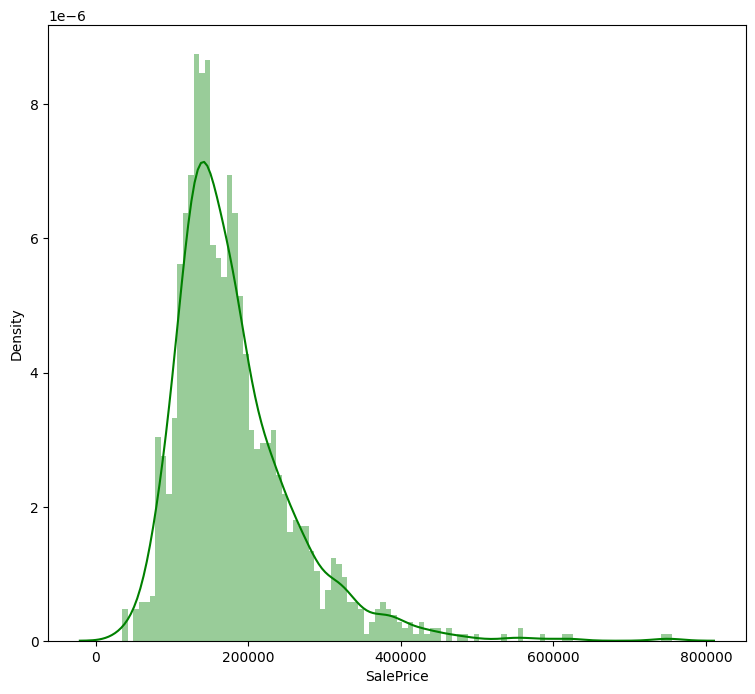

In [10]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Numerical data distribution

We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [11]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [12]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Now let us plot the distribution for all the numerical features.

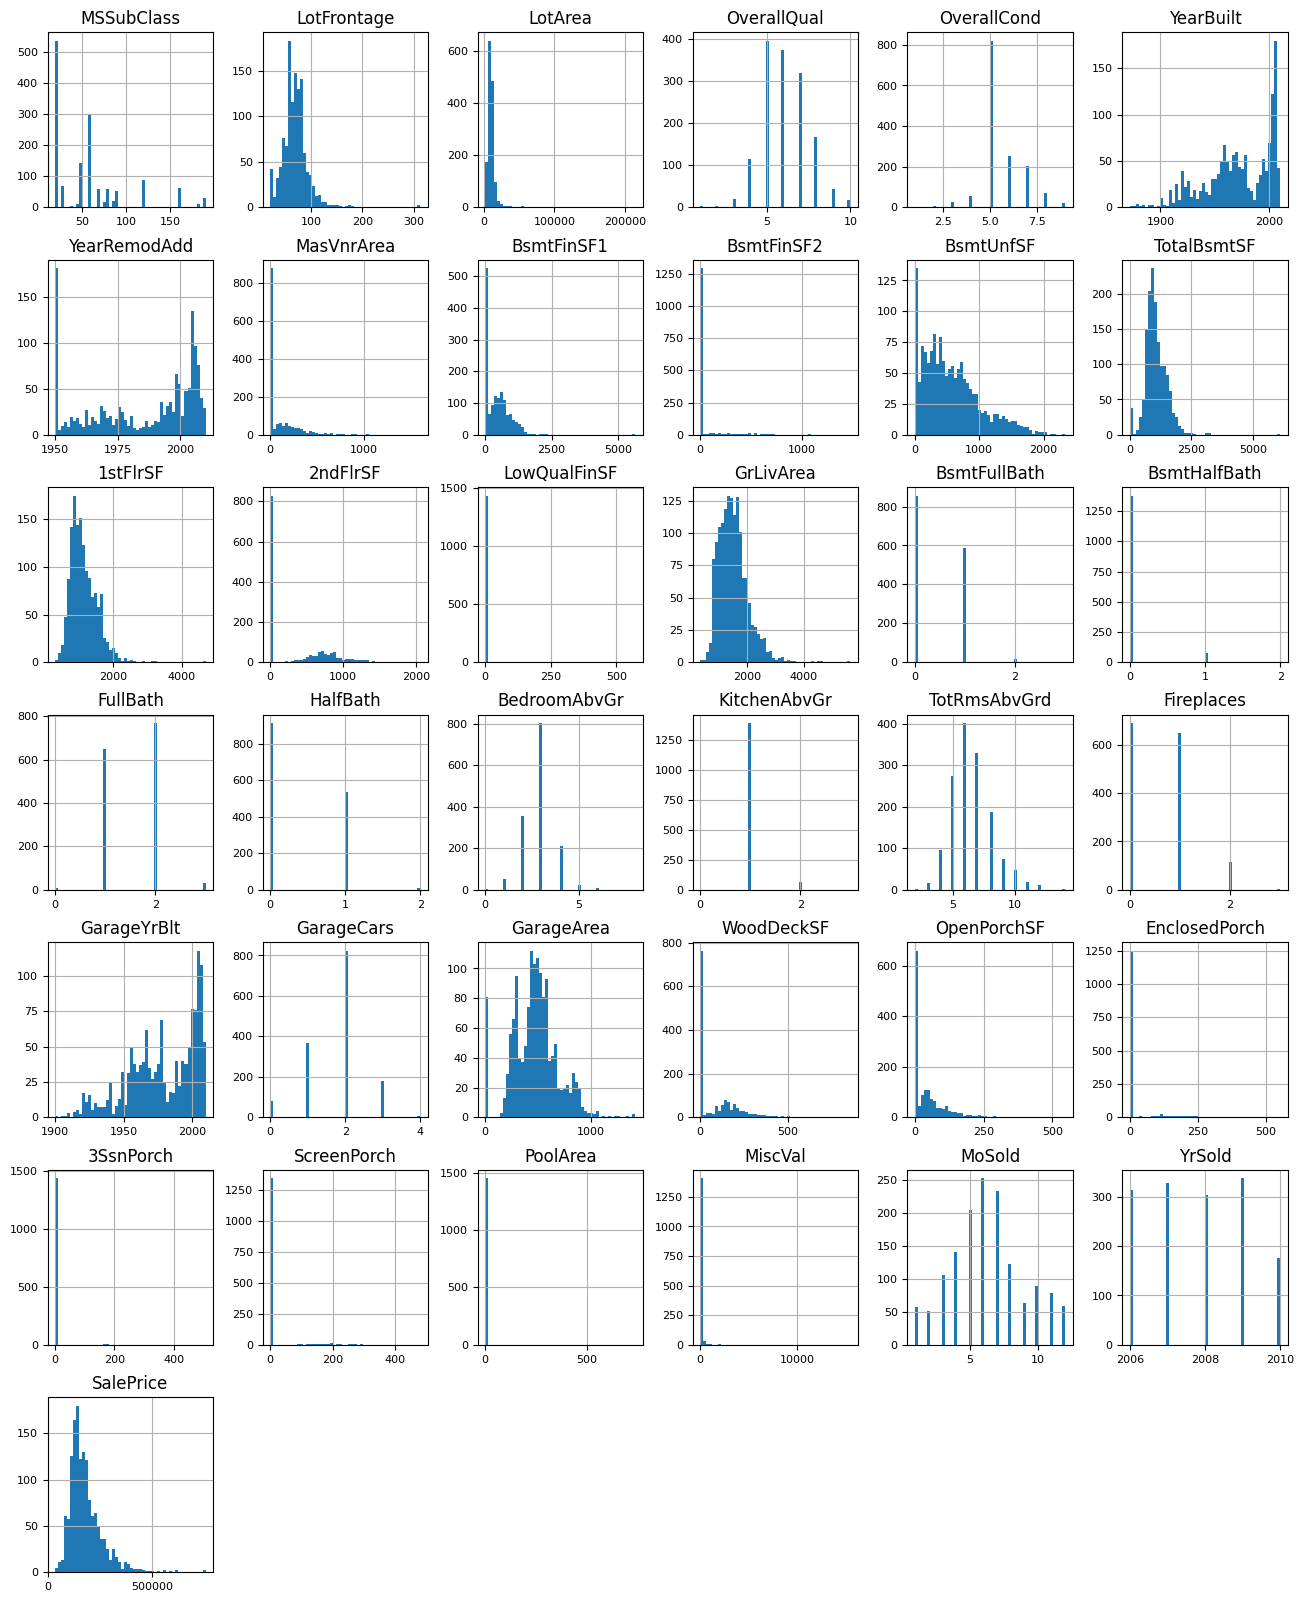

In [13]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Prepare the dataset

This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required. This is one advantage of tree-based models, making them a great entry point to Tensorflow and ML.

Now let us split the dataset into training and testing datasets:

In [17]:
# Handle missing values and categorical data
dataset_df = pd.get_dummies(dataset_df, drop_first=True)  # One-hot encoding
dataset_df = dataset_df.fillna(dataset_df.mean())  # Fill missing values with mean

In [18]:
#Split the dataset to 3
temp_df, test_df = train_test_split(dataset_df, test_size=0.3, random_state=42)
train_df, valid_df = train_test_split(temp_df, test_size=0.5, random_state=42)


In [11]:
"""import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))"""

1021 examples in training, 439 examples in testing.


By default the Random Forest Model is configured to train classification tasks. Since this is a regression problem, we will specify the type of the task (`tfdf.keras.Task.REGRESSION`) as a parameter here.

In [19]:
label = 'SalePrice'
#Set features and target
X_train = train_df.drop(label, axis=1)
y_train = train_df[label]

X_valid = valid_df.drop(label, axis=1)
y_valid = valid_df[label]

X_test = test_df.drop(label, axis=1)
y_test = test_df[label]



## Select a Model



## Create a Random Forest


In [20]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_valid_pred = lr.predict(X_valid)
lr_rmse = mean_squared_error(y_valid, lr_valid_pred, squared=False)

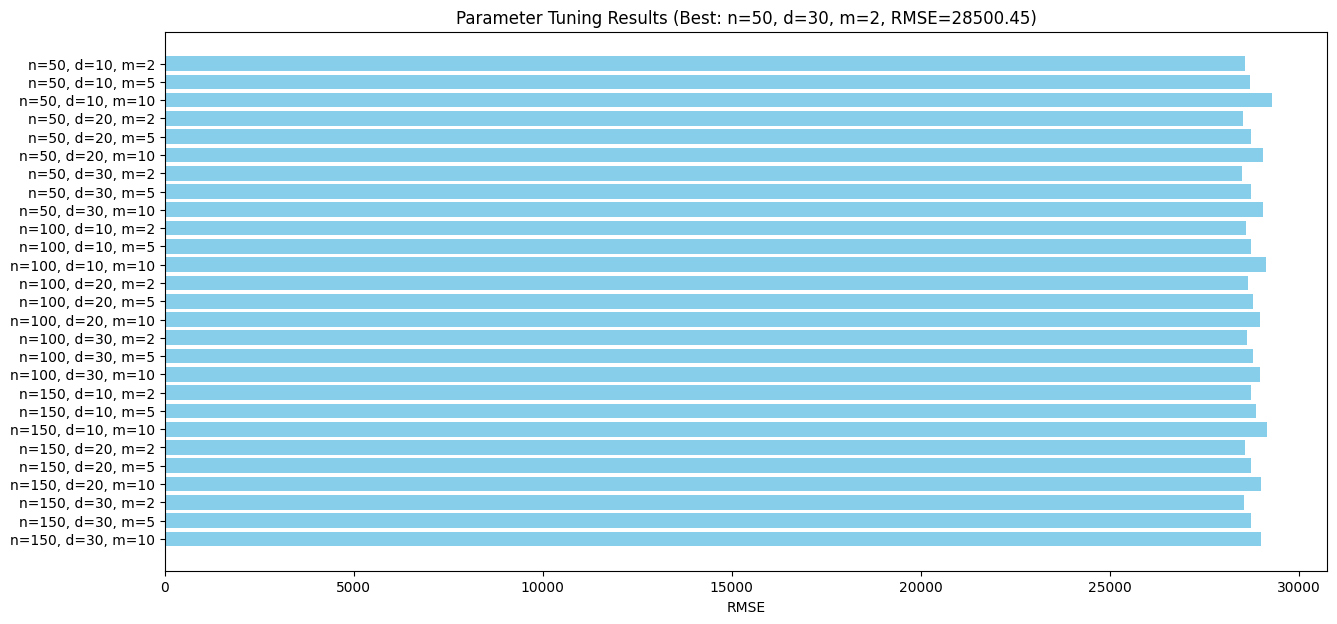

In [47]:


# Define parameter grid
n_estimators_options = [50, 100, 150]
max_depth_options = [10, 20, 30]
min_samples_split_options = [2, 5, 10]

results = []

# Iterate over all combinations
for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        for min_samples_split in min_samples_split_options:
            rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
            rf.fit(X_train, y_train)
            rf_valid_pred = rf.predict(X_valid)
            rf_rmse = mean_squared_error(y_valid, rf_valid_pred, squared=False)
            results.append((n_estimators, max_depth, min_samples_split, rf_rmse))

# Extract the best combination
best_params = min(results, key=lambda x: x[3])

# Plotting the results
labels = [f"n={x[0]}, d={x[1]}, m={x[2]}" for x in results]
rmse_values = [x[3] for x in results]

plt.figure(figsize=(15, 7))
plt.barh(labels, rmse_values, color='skyblue')
plt.xlabel('RMSE')
plt.title(f'Parameter Tuning Results (Best: n={best_params[0]}, d={best_params[1]}, m={best_params[2]}, RMSE={best_params[3]:.2f})')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


In [49]:
# Random Forest
rf = RandomForestRegressor(n_estimators=50, max_depth=30, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)
rf_valid_pred = rf.predict(X_valid)
rf_rmse = mean_squared_error(y_valid, rf_valid_pred, squared=False)

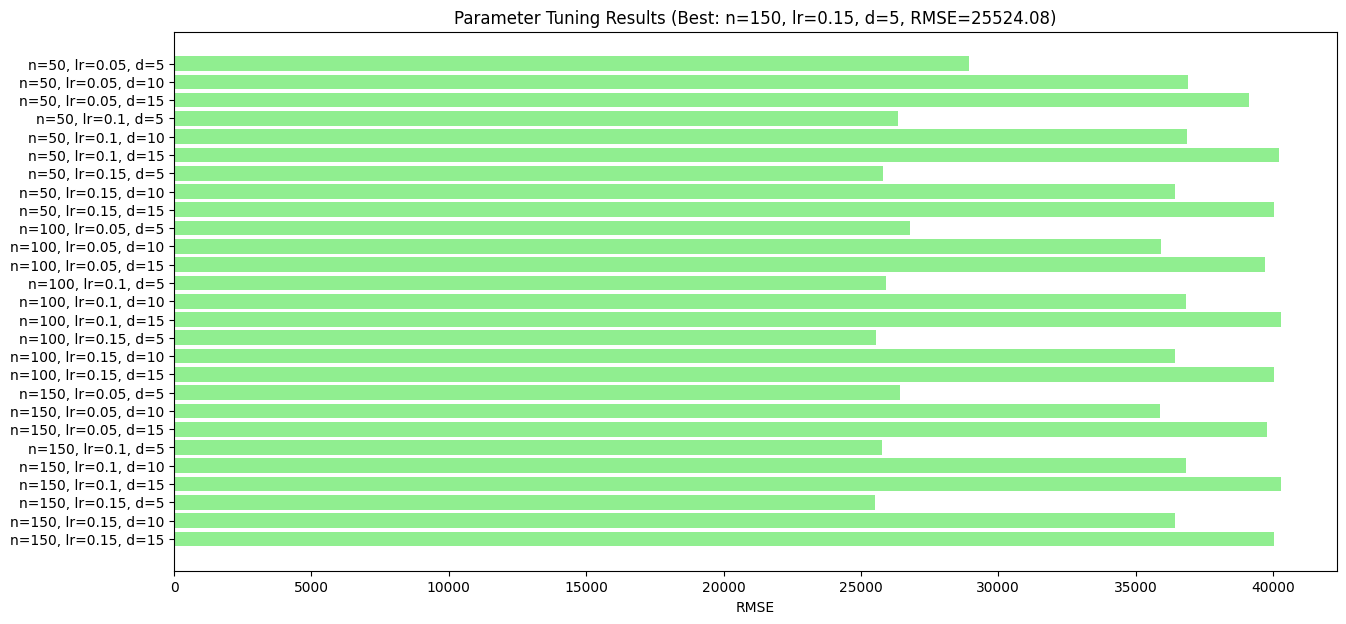

In [48]:
# Define parameter grid
n_estimators_options = [50, 100, 150]
learning_rate_options = [0.05, 0.1, 0.15]
max_depth_options = [5, 10, 15]

results = []

# Iterate over all combinations
for n_estimators in n_estimators_options:
    for learning_rate in learning_rate_options:
        for max_depth in max_depth_options:
            gb = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
            gb.fit(X_train, y_train)
            gb_valid_pred = gb.predict(X_valid)
            gb_rmse = mean_squared_error(y_valid, gb_valid_pred, squared=False)
            results.append((n_estimators, learning_rate, max_depth, gb_rmse))

# Extract the best combination
best_params = min(results, key=lambda x: x[3])

# Plotting the results
labels = [f"n={x[0]}, lr={x[1]}, d={x[2]}" for x in results]
rmse_values = [x[3] for x in results]

plt.figure(figsize=(15, 7))
plt.barh(labels, rmse_values, color='lightgreen')
plt.xlabel('RMSE')
plt.title(f'Parameter Tuning Results (Best: n={best_params[0]}, lr={best_params[1]}, d={best_params[2]}, RMSE={best_params[3]:.2f})')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


In [50]:
# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=150, learning_rate=0.15, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
gb_valid_pred = gb.predict(X_valid)
gb_rmse = mean_squared_error(y_valid, gb_valid_pred, squared=False)


## Visualize the model
One benefit of tree-based models is that you can easily visualize them. The default number of trees used in the Random Forests is 300. We can select a tree to display below.

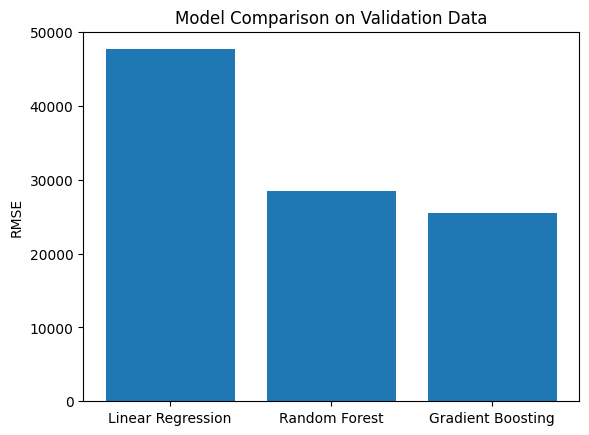

In [51]:
# Comparing the three algorithms
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
rmse_values = [lr_rmse, rf_rmse, gb_rmse]

plt.bar(models, rmse_values)
plt.ylabel('RMSE')
plt.title('Model Comparison on Validation Data')
plt.show()

## Evaluate the model on the Out of bag (OOB) data and the validation dataset

Before training the dataset we have manually seperated 20% of the dataset for validation named as `valid_ds`.

We can also use Out of bag (OOB) score to validate our RandomForestModel.
To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB).
OOB score is computed on the OOB data.

Read more about OOB data [here](https://developers.google.com/machine-learning/decision-forests/out-of-bag).

The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model. Let us plot this.

Note: Smaller values are better for this hyperparameter.

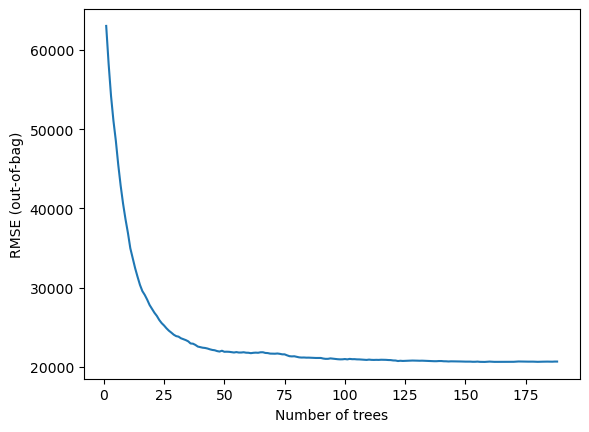

In [17]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

We can also see some general stats on the OOB dataset:

In [18]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=None, accuracy=None, loss=20623.896484375, rmse=20623.896484375, ndcg=None, aucs=None, auuc=None, qini=None)

Now, let us run an evaluation using the validation dataset.

In [19]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 876ms/step - loss: 0.0000e+00 - mse: 923770304.0000
loss: 0.0000
mse: 923770304.0000


## Variable importances

Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests.
Let us list the available `Variable Importances` for Decision Trees:

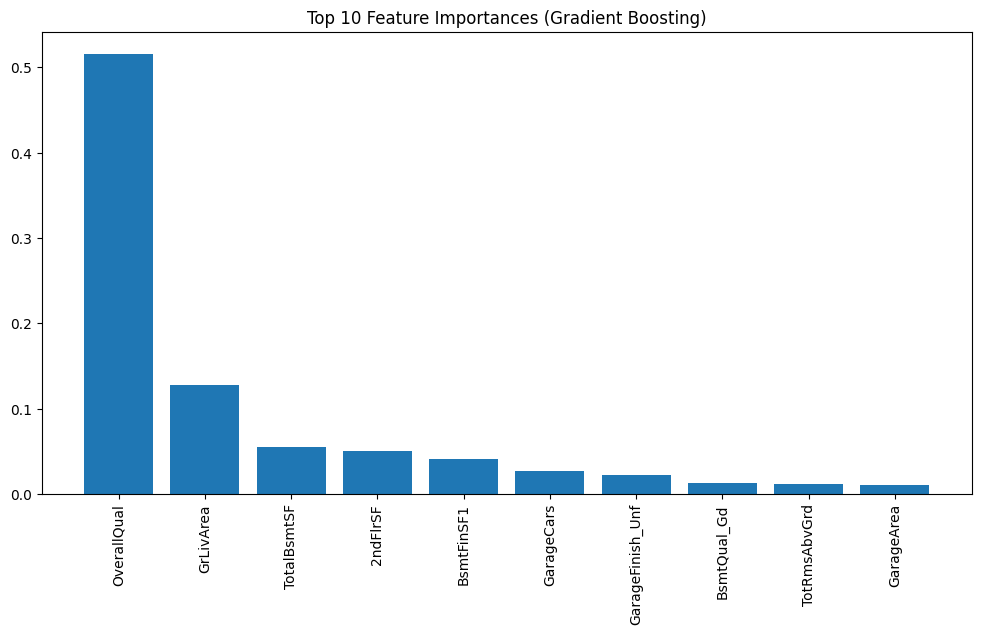

In [52]:
# Feature Importance for Gradient Boosting
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10
plt.figure(figsize=(12, 6))
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.bar(range(top_n), importances[indices][:top_n], align="center")
plt.xticks(range(top_n), X_train.columns[indices][:top_n], rotation=90)
plt.show()

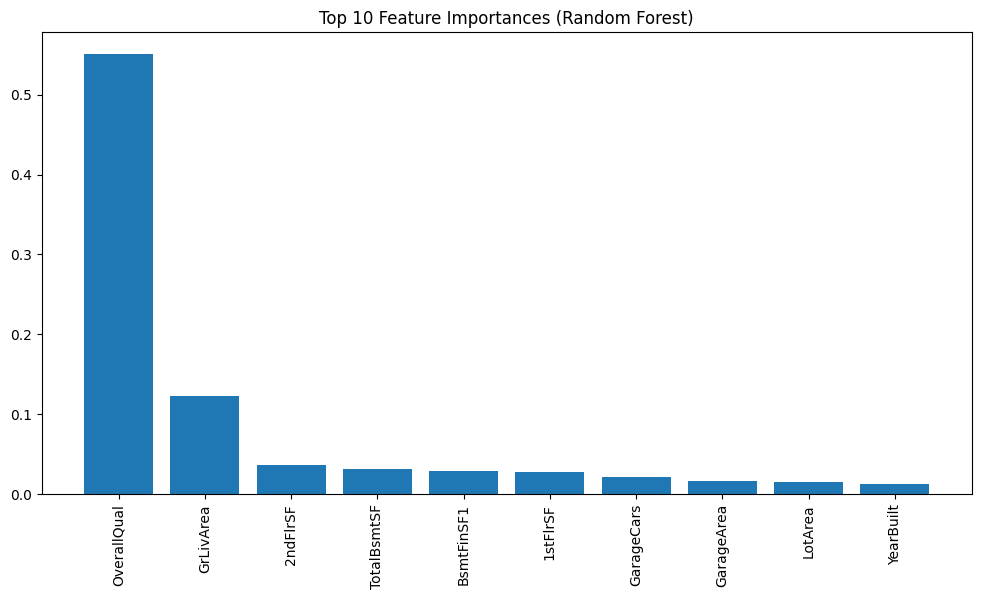

In [35]:
# Feature Importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10
plt.figure(figsize=(12, 6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.bar(range(top_n), importances[indices][:top_n], align="center")
plt.xticks(range(top_n), X_train.columns[indices][:top_n], rotation=90)
plt.show()

In [53]:
# Evaluate the best model
gb_test_pred = gb.predict(X_test)
gb_test_rmse = mean_squared_error(y_test, gb_test_pred, squared=False)
print(f"Random Forest RMSE on Test Data: {gb_test_rmse}")

Random Forest RMSE on Test Data: 29003.305761434593


In [34]:
# Evaluate the best model
rf_test_pred = rf.predict(X_test)
rf_test_rmse = mean_squared_error(y_test, rf_test_pred, squared=False)
print(f"Random Forest RMSE on Test Data: {rf_test_rmse}")

Random Forest RMSE on Test Data: 29505.99519674437
